In [83]:
import pandas as pd

# carrega os dados da planilha
file_path = 'form.xlsx'
data = pd.read_excel(file_path)

# exibe o começo da estrutura para ver se não deu cagada
data.head()

,Carimbo de data/hora,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
0,2024-06-11 01:13:54.601,Analista de Qualidade / Produto / Teste,GIT,11-20,Ecommerce,Jira,Jenkins,Várias vezes ao dia,4,"Testes automatizados, Colaboração e comunicação",5,Em branco,Custo maior de manutenção das ferramentas e te...,Ambiente de desenvolvimento ficará mais dinâmi...
1,2024-06-11 22:39:25.121,Analista de Qualidade / Produto / Teste,GIT,1-5,Telecom,Azure,Não utilizo,Quinzenalmente,3,Automação de builds,5,Pleno,não sei dizer,agilizar os processos
2,2024-06-11 22:45:03.595,Analista de Qualidade / Produto / Teste,GIT,1-5,Varejo,ClickUp,GitLab CI,Diariamente (uma vez ao dia),2,Colaboração e comunicação,4,Júnior,conseguir filtrar o excesso de informações,redução drástica no tempo de realização das ta...
3,2024-06-11 23:17:39.672,Gerente de Projetos (gestores e líderes em geral),GIT,6-10,ERP,"Jira, Asana, Mantis Bug Tracker",Não utilizo,Diariamente (uma vez ao dia),2,Deploy contínuo,5,Pleno,Em branco,Em branco
4,2024-06-11 23:18:00.186,Gerente de Projetos (gestores e líderes em geral),GIT,6-10,Tecnologia,Asana,GitLab CI,Várias vezes ao dia,4,"Automação de builds, Testes automatizados, Dep...",5,Pleno,Em branco,Em branco


In [14]:
# faz a contagem dos cargos respondidos
contagem_cargos = data['P1'].value_counts()
contagem_cargos

P1
Analista de Qualidade / Produto / Teste              12
Desenvolvedor - Backend                               8
Gerente de Projetos (gestores e líderes em geral)     2
Infraestrutura/Devops                                 2
Desenvolvedor Full Stack                              1
Desenvolvedor - Frontend                              1
Professor                                             1
Name: count, dtype: int64

In [9]:
# faz a contagem das ferramentas de controle de versão
ferramentas_controle_versao = data['P2'].str.get_dummies(sep=', ').sum()
ferramentas_controle_versao

GIT    25
SVN     2
dtype: int64

In [10]:
# faz a contagem do tamanho das equipes
tamanho_equipes = data['P3'].value_counts()
tamanho_equipes

P3
1-5      13
6-10      9
11-20     4
21-50     1
Name: count, dtype: int64

In [13]:
# faz a contagem da frequencia de integração de código
frequencia_integracao = data['P7'].value_counts()
frequencia_integracao

P7
Várias vezes ao dia             14
Diariamente (uma vez ao dia)     9
Semanalmente                     2
Quinzenalmente                   1
Não realizo                      1
Name: count, dtype: int64

## QP1 - Quais ferramentas de gerenciamento são mais utilizadas por equipes de diferentes tamanhos?

In [ ]:
# dicionario para armazenar os dados finais
ferramentas_por_tam_equipes = {}

# pega os tamanhos das equipes
tamanho_equipes = data['P3'].unique()

# para cada tamanho na lista
for tamanho in tamanho_equipes:

    # filtra os dados apenas do tamanho do loop
    subset = data[data['P3'] == tamanho]

    # conta as ferramentas de gerenciamento mencionadas na resposta da P5
    tool_counts = subset['P5'].str.get_dummies(sep=',').sum()

    # adiciona no dicionário
    ferramentas_por_tam_equipes[tamanho] = tool_counts

# exibe dicionário na tela
ferramentas_por_tam_equipes

In [ ]:
# converte para o dataframe do pandas
tools_df = pd.DataFrame(ferramentas_por_tam_equipes)
tools_df

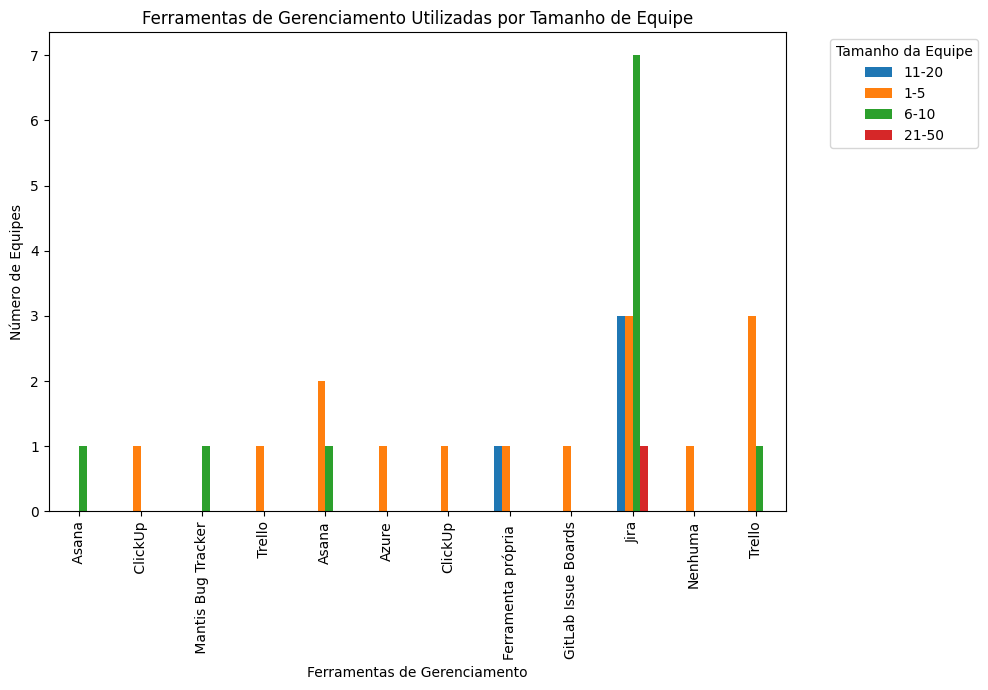

In [40]:
import matplotlib.pyplot as plt

# faz o plot do gráfico ferramentas x tamanho equipe
tools_df.plot(kind='bar', stacked=False, figsize=(10, 7))

# adiciona titulo
plt.title('Ferramentas de Gerenciamento Utilizadas por Tamanho de Equipe')

# adiciona label eixo x
plt.xlabel('Ferramentas de Gerenciamento')

# adiciona label eixo y
plt.ylabel('Número de Equipes')

# adiciona legenda
plt.legend(title='Tamanho da Equipe', bbox_to_anchor=(1.05, 1), loc='upper left')

# ajusta layout
plt.tight_layout()

## QP2 - Como a função desempenhada influencia a adoção de práticas de integração e uso de ferramentas específicas?

In [42]:
# pega as funcoes respondidas no formulario
funcoes = data['P1'].unique()
funcoes

array(['Analista de Qualidade / Produto / Teste',
       'Gerente de Projetos (gestores e líderes em geral)',
       'Desenvolvedor - Backend', 'Infraestrutura/Devops',
       'Desenvolvedor Full Stack', 'Desenvolvedor - Frontend',
       'Professor'], dtype=object)

In [50]:
# dicionário para armazenar as contagens das práticas e ferramentas por função
frequencia_integracao_por_funcao = {}
ferramentas_por_funcao = {}

# loop sobre cada função e contar as práticas e ferramentas
for funcao in funcoes:
    # filtrar dados para a função atual
    subset = data[data['P1'] == funcao]
    
    # contar as práticas de integração contínua
    integration_counts = subset['P7'].value_counts()
    
    # contar as ferramentas específicas utilizadas
    tool_counts = subset['P5'].str.get_dummies(sep=', ').sum()
    
    # armazenar as contagens nos dicionários
    frequencia_integracao_por_funcao[funcao] = integration_counts
    ferramentas_por_funcao[funcao] = tool_counts

(frequencia_integracao_por_funcao, ferramentas_por_funcao)

({'Analista de Qualidade / Produto / Teste': P7
  Várias vezes ao dia             6
  Diariamente (uma vez ao dia)    3
  Quinzenalmente                  1
  Não realizo                     1
  Semanalmente                    1
  Name: count, dtype: int64,
  'Gerente de Projetos (gestores e líderes em geral)': P7
  Diariamente (uma vez ao dia)    1
  Várias vezes ao dia             1
  Name: count, dtype: int64,
  'Desenvolvedor - Backend': P7
  Diariamente (uma vez ao dia)    4
  Várias vezes ao dia             4
  Name: count, dtype: int64,
  'Infraestrutura/Devops': P7
  Várias vezes ao dia             1
  Diariamente (uma vez ao dia)    1
  Name: count, dtype: int64,
  'Desenvolvedor Full Stack': P7
  Várias vezes ao dia    1
  Name: count, dtype: int64,
  'Desenvolvedor - Frontend': P7
  Várias vezes ao dia    1
  Name: count, dtype: int64,
  'Professor': P7
  Semanalmente    1
  Name: count, dtype: int64},
 {'Analista de Qualidade / Produto / Teste': Azure                  1
  Cl

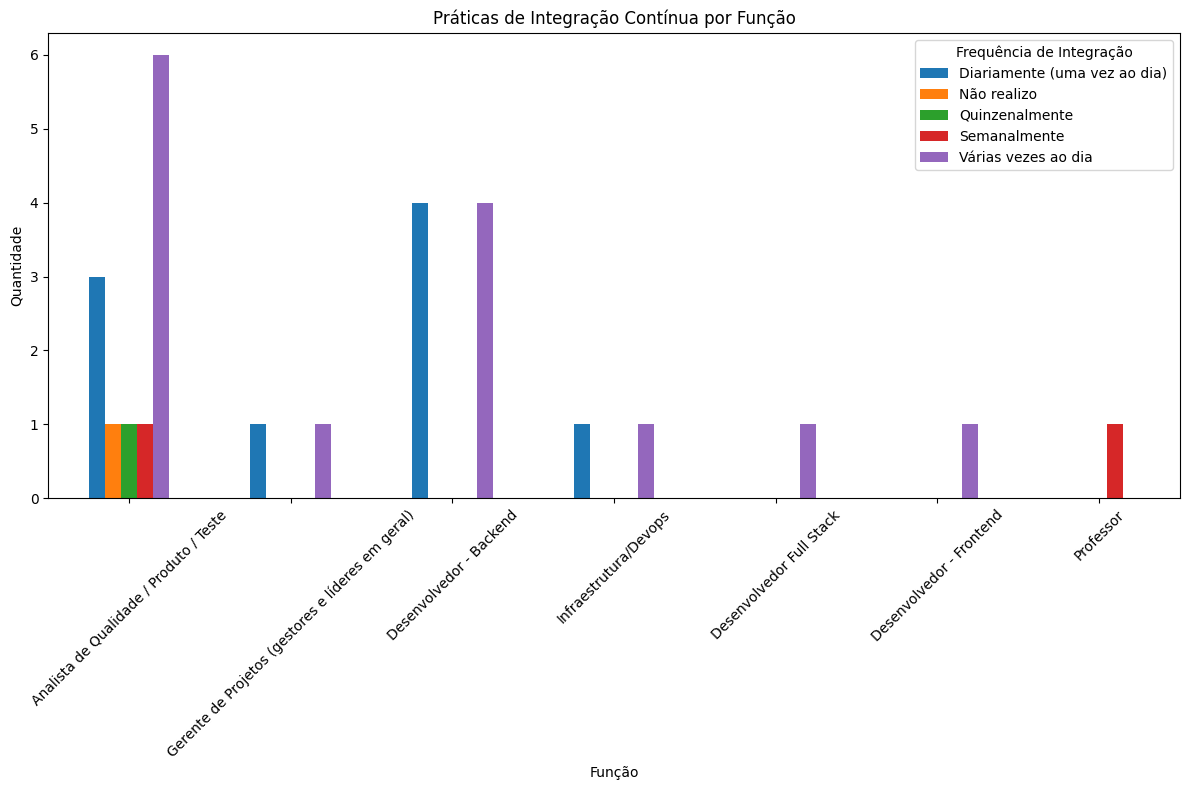

In [57]:
import matplotlib.pyplot as plt

# converte os dicionários para dataframe
frequencia_integracao_por_funcao_df = pd.DataFrame(frequencia_integracao_por_funcao).T
ferramentas_por_funcao_df = pd.DataFrame(ferramentas_por_funcao).T

# grafico frequencia integracao por funcao
frequencia_integracao_por_funcao_df.plot(kind='bar', figsize=(12, 8))
plt.title('Práticas de Integração Contínua por Função')
plt.xlabel('Função')
plt.ylabel('Quantidade')
plt.legend(title='Frequência de Integração')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparações entre funções para cada categoria de frequência de integração de código. É possível identificar se determinadas funções têm uma tendência maior a adotar práticas de integração contínua mais frequentes

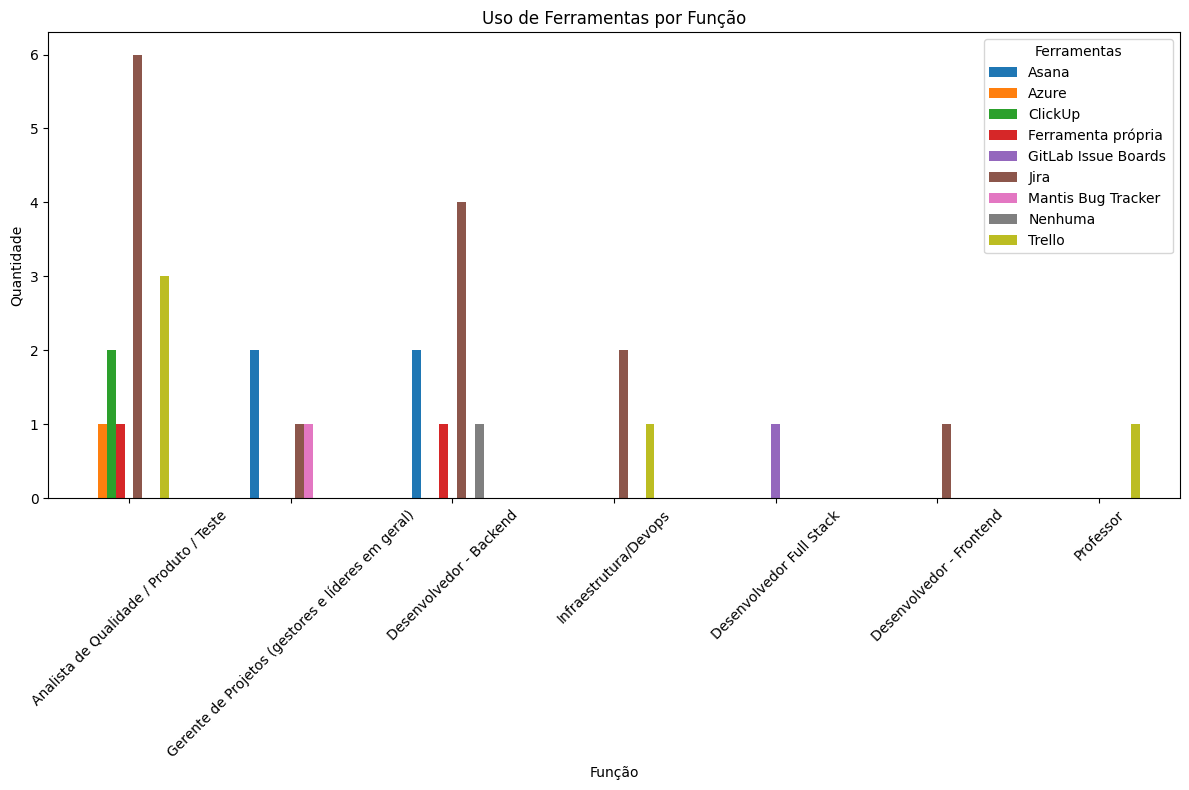

In [58]:
# grafico para uso de ferramentas
ferramentas_por_funcao_df.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Uso de Ferramentas por Função')
plt.xlabel('Função')
plt.ylabel('Quantidade')
plt.legend(title='Ferramentas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Permite ver quais ferramentas são mais populares para cada função e quais são menos utilizadas.

## QP3 - Como a frequência da integração contínua está relacionada ao nível de automação e eficiência da equipe?

In [53]:
freq_integracao = data['P7'].unique()

# Dicionário para armazenar o nível de automação por frequência de integração
automacao_por_freq_integracao = {}

for freq in freq_integracao:
    subset = data[data['P7'] == freq]
    nivel_automacao = subset['P8'].value_counts()
    automacao_por_freq_integracao[freq] = nivel_automacao

# Converter o dicionário em DataFrame
automacao_df = pd.DataFrame(automacao_por_freq_integracao).fillna(0)

# Mostrar os dados coletados
automacao_df


,Várias vezes ao dia,Quinzenalmente,Diariamente (uma vez ao dia),Não realizo,Semanalmente
P8,,,,,
1,0.0,0.0,1,0.0,0.0
2,1.0,0.0,5,0.0,1.0
3,4.0,1.0,2,1.0,1.0
4,9.0,0.0,1,0.0,0.0


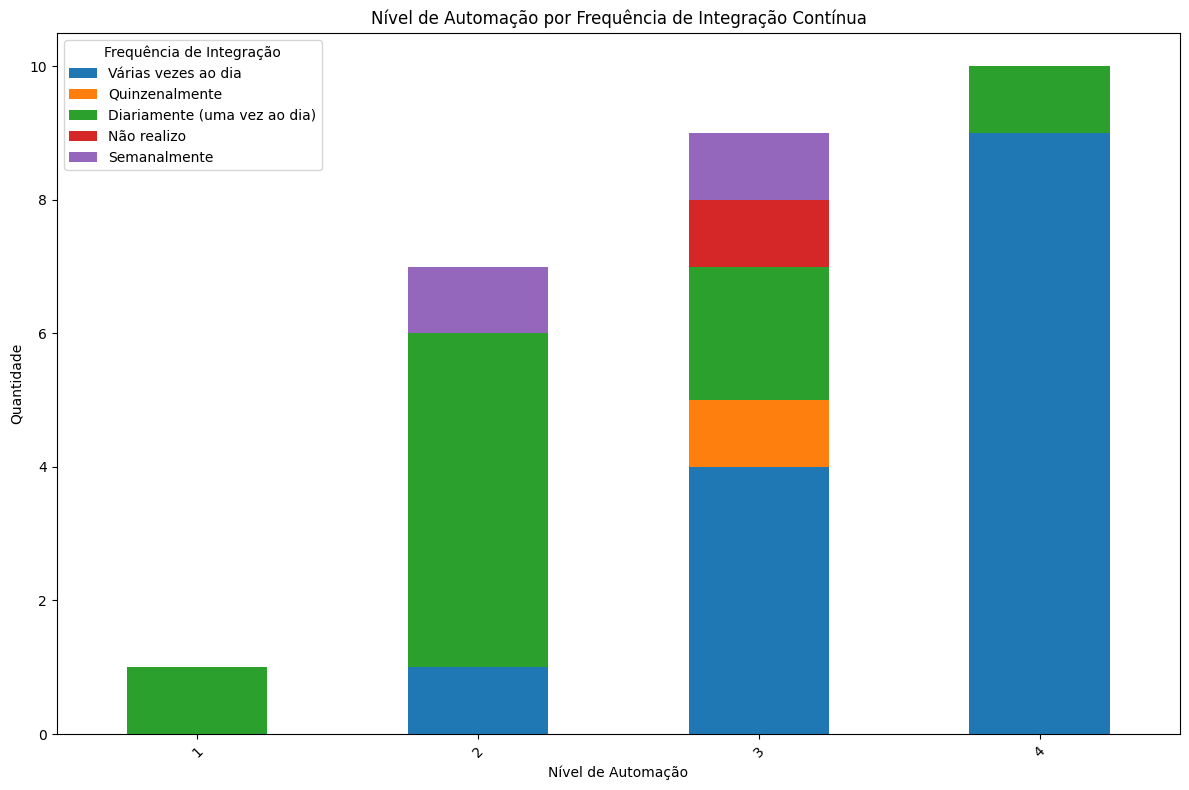

In [55]:
import matplotlib.pyplot as plt

# Gráfico de barras empilhadas para mostrar o nível de automação por frequência de integração
automacao_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Nível de Automação por Frequência de Integração Contínua')
plt.xlabel('Nível de Automação')
plt.ylabel('Quantidade')
plt.legend(title='Frequência de Integração')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Permite identificar se frequências mais altas de integração estão associadas a níveis mais altos de automação

## QP4 - Quais são os problemas mais comuns enfrentados pelas equipes de desenvolvimento em relação às ferramentas e práticas de integração? 

Foram carregadas 1032 palavras.


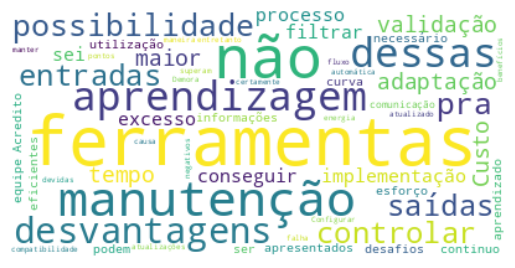

In [80]:
text = " ".join(resposta for resposta in data['P12'])
print ("Foram carregadas {} palavras.".format(len(text)))


from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
palavras_para_ignorar = [
    "a", "aí", "além", "ali", "algo", "alguma", "algumas", "algum", "alguns", 
    "am", "ante", "ao", "aos", "apenas", "após", "aquela", "aquelas", "aquele", 
    "aqueles", "aquilo", "as", "assim", "até", "aí", "bem", "com", "como", 
    "contra", "custa", "da", "das", "de", "dela", "dele", "deles", "demais", 
    "depois", "desde", "dessa", "desse", "desta", "deste", "detrás", "deve", 
    "devem", "devendo", "dever", "deverá", "deverão", "deverão", "deverem", 
    "deveria", "deveriam", "devia", "deviam", "disse", "disso", "diz", "dizem", 
    "dizer", "do", "dos", "durante", "e", "é", "ela", "elas", "ele", "eles", 
    "em", "branco", "enquanto", "entre", "era", "eram", "eramos", "essa", "essas", "esse", 
    "esses", "esta", "está", "estamos", "estão", "estas", "estava", "estavam", 
    "este", "estes", "eu", "fazendo", "fazer", "foi", "for", "foram", "fosse", 
    "fossem", "grande", "grandes", "há", "isso", "isto", "já", "lhe", "lhes", 
    "lo", "mas", "me", "mesma", "mesmas", "mesmo", "mesmos", "meu", "meus", 
    "minha", "minhas", "muito", "na", "nas", "nem", "no", "nos", "nós", "nossa", 
    "nossas", "nosso", "nossos", "num", "numa", "o", "os", "ou", "outra", 
    "outras", "outro", "outros", "para", "pela", "pelas", "pelo", "pelos", 
    "pode", "poder", "poderia", "poderiam", "podia", "podiam", "por", "porque", 
    "pouca", "poucas", "pouco", "poucos", "presente", "própria", "próprias", 
    "próprio", "próprios", "quais", "qual", "qualquer", "quando", "quanto", 
    "quantos", "que", "quem", "se", "seja", "sejam", "sem", "sempre", "sendo", 
    "será", "serão", "seu", "seus", "só", "sob", "sobre", "sua", "suas", 
    "talvez", "também", "te", "tem", "tendo", "tenha", "tenham", "tenho", "ter", 
    "teu", "teus", "tinha", "tinham", "toda", "todas", "todo", "todos", "tu", 
    "tua", "tuas", "tudo", "um", "uma", "umas", "uns", "vai", "vão", "você", 
    "vocês", "vos", "vossa", "vossas", "vosso", "vossos"]
stopwords.update(palavras_para_ignorar)


wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## QP5: Quais são as vantagens das equipes de desenvolvimento em relação às ferramentas e práticas de integração de código?

Foram carregadas 1091 palavras.


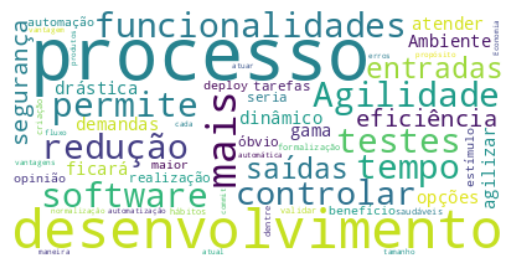

In [84]:
text = " ".join(resposta for resposta in data['P13'])
print ("Foram carregadas {} palavras.".format(len(text)))

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()